## Importing Packages

In [1]:
import fastf1
import fastf1.plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fastf1.plotting.setup_mpl()

## Loading Session Data

In [2]:
year = 2023
race = "British Grand Prix"

session = fastf1.get_session(year, race, 'R')
session.load()

req         WARNING 	DEFAULT CACHE ENABLED! (191.02 MB) C:\Users\odath\AppData\Local\Temp\fastf1
core           INFO 	Loading data for British Grand Prix - Race [v3.7.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching tra

## Load and Prepare Lap Data

In [3]:
laps = session.laps

laps = laps[[
    'Driver', 'LapNumber', 'LapTime',
    'Compound', 'TyreLife', 'Stint', 'Team'
]].dropna()

laps['LapTimeSeconds'] = laps['LapTime'].dt.total_seconds()
laps.head()

,Driver,LapNumber,LapTime,Compound,TyreLife,Stint,Team,LapTimeSeconds
0,VER,1.0,0 days 00:01:37.167000,MEDIUM,1.0,1.0,Red Bull Racing,97.167
1,VER,2.0,0 days 00:01:33.433000,MEDIUM,2.0,1.0,Red Bull Racing,93.433
2,VER,3.0,0 days 00:01:32.730000,MEDIUM,3.0,1.0,Red Bull Racing,92.730
3,VER,4.0,0 days 00:01:32.780000,MEDIUM,4.0,1.0,Red Bull Racing,92.780
4,VER,5.0,0 days 00:01:32.582000,MEDIUM,5.0,1.0,Red Bull Racing,92.582


## Driver Comparison on Same Compound

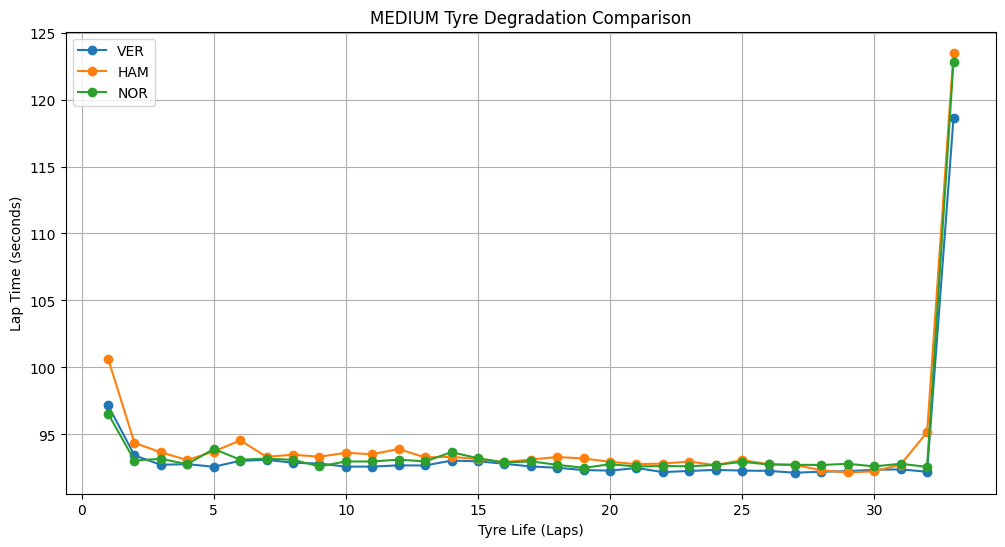

In [4]:
drivers = ['VER', 'HAM', 'NOR']
compound = 'MEDIUM'

plt.figure(figsize=(12,6))

for drv in drivers:
    data = laps[
        (laps['Driver'] == drv) &
        (laps['Compound'] == compound)
    ]
    plt.plot(
        data['TyreLife'],
        data['LapTimeSeconds'],
        marker='o',
        label=drv
    )

plt.title(f"{compound} Tyre Degradation Comparison")
plt.xlabel("Tyre Life (Laps)")
plt.ylabel("Lap Time (seconds)")
plt.legend()
plt.grid(True)
plt.show()


## Driver Comparison on Different Compound

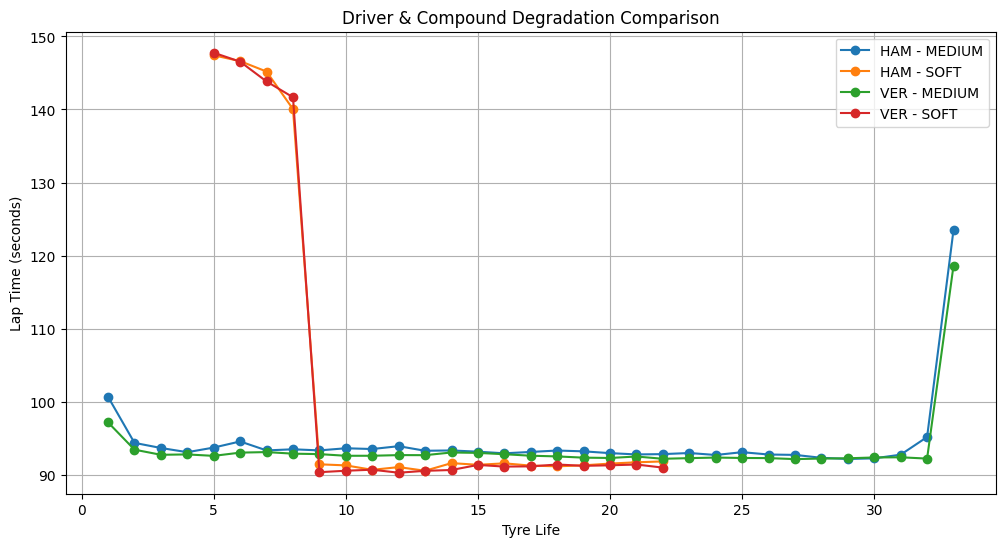

In [5]:
comparison = laps[laps['Driver'].isin(['VER', 'HAM'])]

plt.figure(figsize=(12,6))

for (drv, comp), data in comparison.groupby(['Driver', 'Compound']):
    plt.plot(
        data['TyreLife'],
        data['LapTimeSeconds'],
        marker='o',
        label=f"{drv} - {comp}"
    )

plt.xlabel("Tyre Life")
plt.ylabel("Lap Time (seconds)")
plt.title("Driver & Compound Degradation Comparison")
plt.legend()
plt.grid(True)
plt.show()
